# Knowledge check

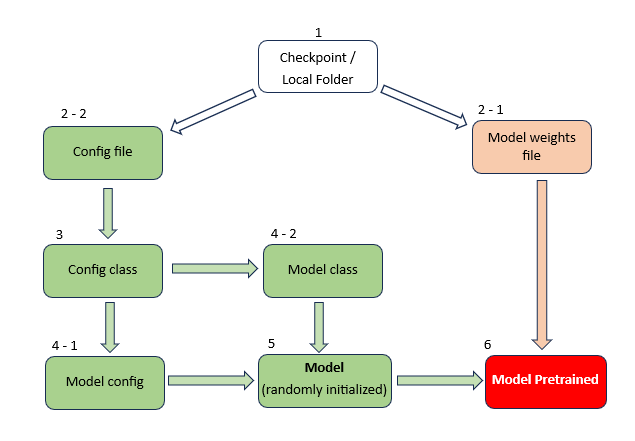

1.	Take Checkpoint to find the Config file and Model file from Hugging Face, or do the same by taking local path if the model \saved locally.<br>
2. split into 2 steps:<br>
2 – 1. Load Model weights file to cache.<br>
2 – 2. Load Config file to cache, read the file and look at the Config class that should be used.<br>
3.   Config class, depending on the model (BERT, GPT-2,or BART, specified in 1), find the model class and instantiate a model configuration object, which is the blueprint how to creat a model.<br>
4. Model Calss (4-2), combined with the load model configuration (4-1), instantiate the model.<br>
5.   The model is created with randomly initialized weights.<br>
6.   Copy the weights from the Model weights file (2-1) to the reandomly initiatlized model (5), and create the pretrained model.<br>


# Load plain model <br>
the model is randomly initialized with weights, and needs to be trained first. Training a Bert model from scratchwould require a long time and a lot of data, and it would have a non-negligible environmental impact. <br>
To avoid such

```
# This is formatted as code
```

unnecessary and duplicated effort, people usually share and reuse models that have already been trained.

In [15]:
from transformers import AutoModel, AutoConfig, BertModel, BertConfig

config = BertConfig()
model = BertModel(config)    # the model is randomly initialized so far
print(config)

# We cannot use AutoModel and AutoConfig, in replace of BertModel and BertConfig here,
# because AutoModel and AutoConfig are used specifically for pre-trained models

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [10]:
# cutomize the model based on config parameters

from transformers import AutoModel, AutoConfig,BertModel, BertConfig

config = BertConfig()
config.num_hidden_layers = 10   # customize # of hidden layers to 10
config.hidden_act = "relu"      # change hidden layer aciation function to "relu"
model = BertModel(config)
print(config)

#================================================
# max_position_embeddings: the maximum sequence length that the model can handle.
# classifier_dropout: the dropout probability used in the classification layer. This parameter determines the probability
#        of randomly setting input units to 0 at each update during training time, which helps prevent overfitting.
#intermediate_size: the dimensionality of the intermediate layer. It is the size of the first linear transformation within
#        the feedforward neural network.
#initializer_range: the range to randomly initialize weight matrices
#================================================

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "relu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 10,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



# Load pre-trained model <br>
Copied the pre-trained weights to the plain model.
the weights have been downloaded and cached by the 1st call of from_pretrained() method (any future calls won’t re-download them) in the cache folder, which defaults to ~/.cache/huggingface/transformers. You can customize your cache folder by setting the HF_HOME environment variable.

In [17]:
from transformers import AutoModel, AutoConfig, BertModel, BertConfig

checkpoint = "bert-base-cased"
config = BertConfig.from_pretrained(checkpoint, num_hidden_layers = 10)  # customize # of hidden layers to 10
model = BertModel.from_pretrained(checkpoint)
print(config)

#==========================================================================================
# We can interchangably use AutoModel/AutoConfig and BertModel/BertConfig in pretrainined model, even though the architecture is different,
# as long as the checkpoint was trained for a similar task (for example, a sentiment analysis task).
#==========================================================================================

# each model has a model card, containing how the model was trained, what it can do, and limitations.

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 10,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

